In [1]:
import sys
sys.path.append("..")

import matplotlib.pyplot as plt
from scziDesk_preprocess import *
from scziDesk_network import *
from scziDesk_utils import *
import argparse
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import glob2
from tqdm.notebook import tqdm
plt.ion()
plt.show()
%load_ext autoreload
%autoreload 2


/opt/conda/lib/python3.7/site-packages/scanpy/api/__init__.py:7: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning,
Using TensorFlow backend.


In [2]:
from scipy.stats import skew, kurtosis

In [5]:
# category = "real_data"
category = "imbalanced_data"
category = "balanced_data"
path= ".."
if category in ["balanced_data", "imbalanced_data"]:
    files = glob2.glob(f'{path}/R/simulated_data/{category}/*.h5')
    files = [f[len(f"{path}/R/simulated_data/{category}/"):-3] for f in files]
else:
    files = glob2.glob(f'{path}/real_data/*.h5')
    files = [f[len(f"{path}/real_data/"):-3] for f in files]
print(files)

['data_1c8', 'data_-1c4', 'data_-1c8', 'data_0c4', 'data_0c8', 'data_0c16', 'data_1.5c4', 'data_1c4', 'data_1.5c8', 'data_1.5c16', 'data_-1c16', 'data_1c16']


>>>>dataset data_1c8


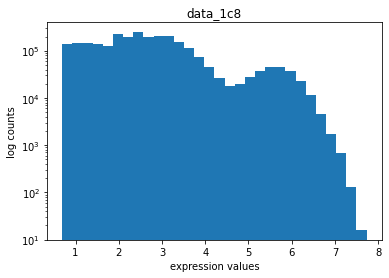

>>>>dataset data_-1c4


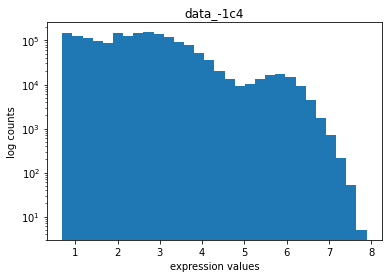

>>>>dataset data_-1c8


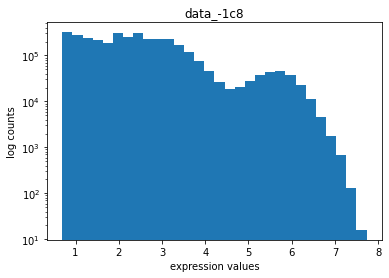

>>>>dataset data_0c4


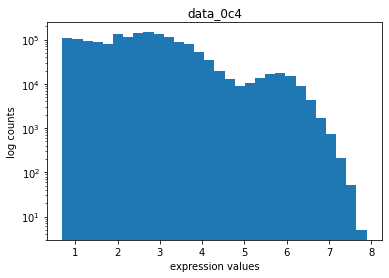

>>>>dataset data_0c8


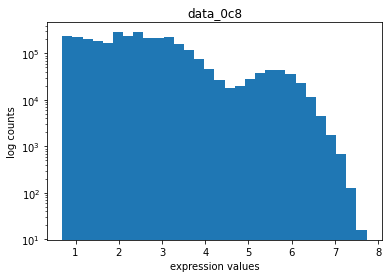

>>>>dataset data_0c16


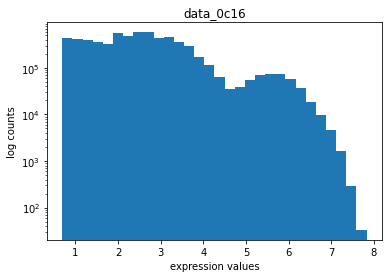

>>>>dataset data_1.5c4


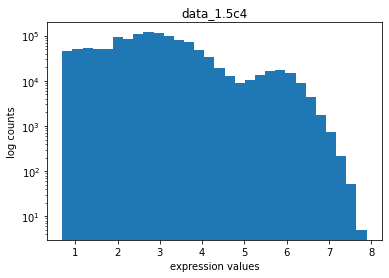

>>>>dataset data_1c4


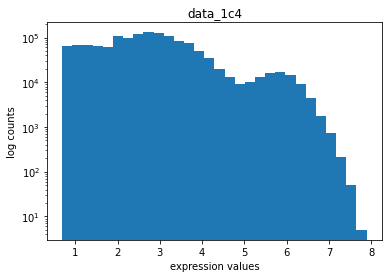

>>>>dataset data_1.5c8


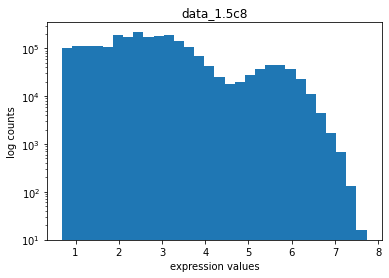

>>>>dataset data_1.5c16


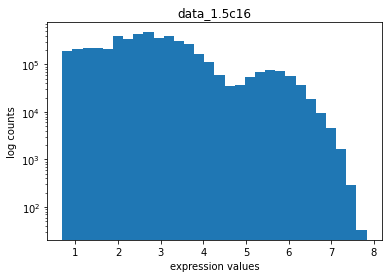

>>>>dataset data_-1c16


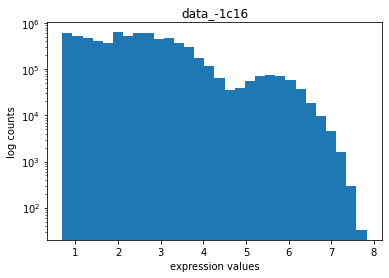

>>>>dataset data_1c16


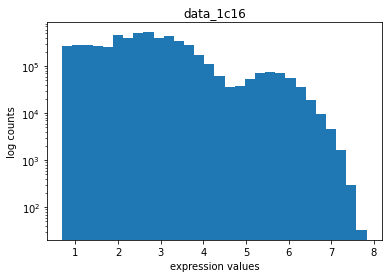

In [6]:
df = pd.DataFrame(columns=["dataset", "size", "nb_clusters",  
                          "sparsity", "max_value", "non_zero_mean","non_zero_median", "non_zero_skew", 
                           "non_zero_kurosis", "cluster_sizes",])

for dataset in tqdm(files):
    if category in ["balanced_data", "imbalanced_data"]:
        data_mat = h5py.File(f"{path}/R/simulated_data/{category}/{dataset}.h5","r")
    else:
        data_mat = h5py.File(f"{path}/real_data/{dataset}.h5","r")
        
    Y = np.array(data_mat['Y'])
    X = np.array(data_mat['X'])
    print(f">>>>dataset {dataset}")

    if category == "real_data" and X.shape[0] > 20000:
        continue
    n_clusters = np.unique(Y).shape[0]
    sparsity = len(np.where(X == 0)[0])/(X.shape[0] *X.shape[1])
    X = np.log1p(X)
    max_value = int(np.max(X))
    non_zero = X[np.where(X != 0)]
    non_zero_mean = np.mean(non_zero)
    non_zero_median= np.median(non_zero)
    non_zero_skew=skew(non_zero)
    non_zero_kurosis=kurtosis(non_zero)
    df.loc[df.shape[0]] = [
        dataset, f"{X.shape[0]} x {X.shape[1]}", n_clusters,
        
        sparsity, max_value, non_zero_mean, non_zero_median, non_zero_skew, non_zero_kurosis,
        list(zip(*Counter(Y).most_common()))[1]
    ]
    plt.figure()
    plt.hist(non_zero, bins = 30, log = True)
    plt.xlabel("expression values")
    plt.ylabel("log counts")
    plt.title(dataset)
    plt.show()

# df.sort_values(by="nb_clusters").reset_index(
#     drop=True).to_excel(f"../output/pickle_results/{category}/description.xlsx")
df.sort_values(by="nb_clusters").reset_index(
    drop=True).to_pickle(f"../output/pickle_results/{category}/description.pkl")

In [ ]:
df

In [ ]:
df.cluster_sizes.values[-5]